# Statistics for Data Science - The Boston House Prices Data Set

## Task 1: Become familiar with the dataset
The following describes the dataset variables:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in \$1000's



## Task 3: Load in the Dataset

In [1]:
# Get data in pandas data frame:
import pandas as pd

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Task 4: Generate Descriptive Statistics and Visualizations

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/michaelf/opt/anaconda3/envs/coursera/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


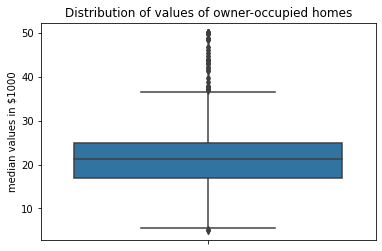

In [3]:
# For the "Median value of owner-occupied homes" provide a boxplot
sns.boxplot(y = 'MEDV', data = boston_df)
plt.title("Distribution of values of owner-occupied homes")
plt.ylabel("median values in $1000")
plt.show()

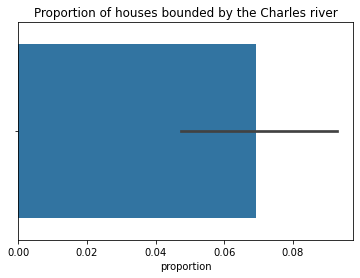

In [4]:
# Provide a bar plot for the Charles river variable
sns.barplot(x = 'CHAS', data = boston_df)
plt.title("Proportion of houses bounded by the Charles river")
plt.ylabel("")
plt.xlabel("proportion")
plt.show()

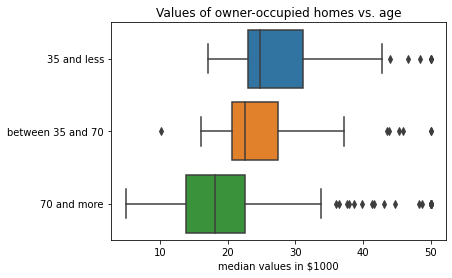

In [5]:
# Provide a boxplot for the MEDV variable vs the AGE variable.
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
# NOTE: I don't think that AGE is an age in years, its definition is that of a proportion of houses built before 1940
boston_df['grouped_age'] = pd.cut(boston_df['AGE'],
                                  bins = [0,35,70,120],
                                  labels=['35 and less','between 35 and 70','70 and more'])
sns.boxplot(x = 'MEDV', y = 'grouped_age', data = boston_df, orient='h')
plt.title("Values of owner-occupied homes vs. age")
plt.xlabel("median values in $1000")
plt.ylabel("")
plt.show()

If the AGE variable is a proportion as stated in the variable description (but the task formulation at hand is confusing, since it suggests that it is an age in years), the plot displays that in more recent towns, i. e. with a lower proportion of houses built before 1940 (AGE), houses are more expensive as indicated by higher median values of owner-occupied homes. Or in other words: Modern homes are more expensive!

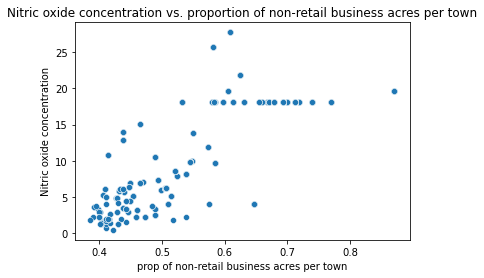

In [6]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations 
# and the proportion of non-retail business acres per town.
# What can you say about the relationship?
sns.scatterplot(x = 'NOX', y = 'INDUS', data = boston_df)
plt.title("Nitric oxide concentration vs. proportion of non-retail business acres per town")
plt.ylabel("Nitric oxide concentration")
plt.xlabel("prop of non-retail business acres per town")
plt.show()

**Conclusion:** The plot indicates a positive correlation between Nitric oxide concentration and the proportion of business acres.

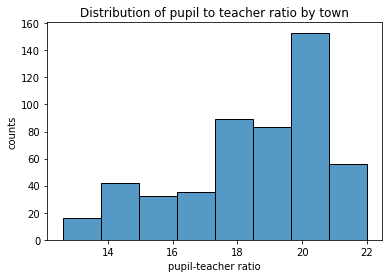

In [7]:
# Create a histogram for the pupil to teacher ratio variable
sns.histplot(x = 'PTRATIO', data = boston_df, bins = 8)
plt.title("Distribution of pupil to teacher ratio by town")
plt.ylabel("counts")
plt.xlabel("pupil-teacher ratio")
plt.show()

## Task 5: Use the appropriate tests to answer the questions provided.

### Is there a significant difference in the median value of houses bounded by the Charles river or not?

In [8]:
# Is there a significant difference in median value of houses bounded by the Charles river or not?
# (T-test for independent samples)
from scipy.stats import ttest_ind

ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'],
          boston_df[boston_df['CHAS']==1]['MEDV'],
          equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

**Conclusion:** Since the p-value is less than alpha value 0.05, the null hypothesis of equal _median values of houses_ bounded by the Charles river compared to those that are not can be rejected. Therefore, houses bounded by the Charles river have significantly lower median values.

### Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

#### Test for equality of variance

In [9]:
# Is there a difference in Median values of houses (MEDV) for each
# proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
from scipy.stats import levene

levene(boston_df[boston_df['grouped_age'] == '35 and less']['MEDV'],
       boston_df[boston_df['grouped_age'] == 'between 35 and 70']['MEDV'], 
       boston_df[boston_df['grouped_age'] == '70 and more']['MEDV'], 
       center='mean')

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

The p-value of the Levene Test is >0.05. Therefore the Null-hyposthesis of equal variances is not rejected.

#### One-way ANOVA: Tests for a difference of group means for the median values of houses

In [10]:
from scipy.stats import f_oneway
f_stat, p_val = f_oneway(boston_df[boston_df['grouped_age'] == '35 and less']['MEDV'], 
                         boston_df[boston_df['grouped_age'] == 'between 35 and 70']['MEDV'], 
                         boston_df[boston_df['grouped_age'] == '70 and more']['MEDV'])
print("F_Statistic: {0}, P-Value: {1}".format(f_stat,p_val))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** With a very low p-value (<0.001) there is significant evidence that at least one of the group means differs.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

The Null-Hypothesis is that there is no correlation (linear relationship) between NO concentration and the proportion of non-retail business acres per town.

In [11]:
from scipy.stats import pearsonr
r, p_val = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("Pearson corr. coef.: {0}, P-Value: {1}".format(r,p_val))

Pearson corr. coef.: 0.7636514469209161, P-Value: 7.913361061230596e-98


**Conclusion:** Based on the highly significant (p<0.001) correlation coefficient of 0.76, we have to conclude that there is a positive correlation between NO concentration and the proportion of non-retail business acres per town. This finding suggests that, the more area of town is occupied by business (industrial) parks, the higher Nitric oxide concentrations are.

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Text(0.5, 1.0, 'Median Values of owner-occupied Homes vs. Distance to Employment Centres')

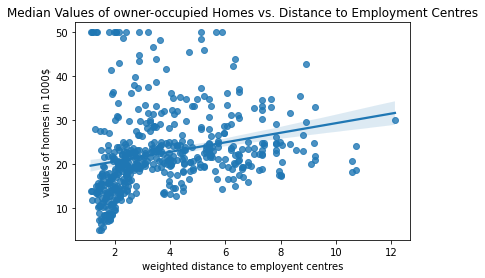

In [17]:
# Seaborn Regression Plot:
sns.regplot(x='DIS', y='MEDV', data=boston_df)
plt.xlabel("weighted distance to employent centres")
plt.ylabel("values of homes in 1000$")
plt.title("Median Values of owner-occupied Homes vs. Distance to Employment Centres")

From the scatter plot, it is clearly seen that a linear regression is not well suited. It seems that employees do not like to live very close to their workplace or industrial parks in general, and that thus house values go down the closer it is to such a location. At a weighted distance below 3 there is a strong relationship between distance and the medians of house values, but beyond that there is no further effect.

This could be solved by fitting a non-linear model, a polynomial model or a piecewise linear model.
Here I will do the last.

Furthermore there are very high median values, that also seem to clip at \\$50k. I will therefore (for the piecewise regression only) define very high values as outliers. By visual inspection from the densities of values the threshold will be set to \\$35k.

#### Fit a simple linear model

In [12]:
import statsmodels.api as sm

y = boston_df['MEDV']
x = boston_df['DIS']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              1380.
Date:                Wed, 24 Aug 2022   Prob (F-statistic):                   1.52e-146
Time:                        10:39:27   Log-Likelihood:                         -1999.8
No. Observations:                 506   AIC:                                      4002.
Df Residuals:                     505   BIC:                                      4006.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DIS            4.7985      0.129     37.149      0.000       4.545       5.052
==============================================================================
Omnibus:                       40.135   Durbin-Watson:                   0.343
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.968
Skew:                           0.431   Prob(JB):                     1.76e-20
Kurtosis:                       4.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** This suggests that in average an increase of the weighted distance by one results in a significant increase of the house value by \$4798 (p<0.001).

#### A piecewise linear model

Outliers are defined as _median value of owner-occupied homes_ (MEDV) larger than \\$35k.
The dataset is split into two parts where _weighted distance to the 5 Boston employment centres_ (DIS) is 3.

In [ ]:
# Define low distance as DIS<=3
idx_low_dis = boston_df['DIS']<=3
# Define outliers in MEDV as MEDV>35
out = boston_df['MEDV']>35  # outliers by visual inspection

# First piece of data where DIS<=3
y1 = boston_df[idx_low_dis&~out]['MEDV']
X1 = boston_df[idx_low_dis&~out]['DIS']
# Second piece of data where DIS>3
y2 = boston_df[~idx_low_dis&~out]['MEDV']
X2 = boston_df[~idx_low_dis&~out]['DIS']

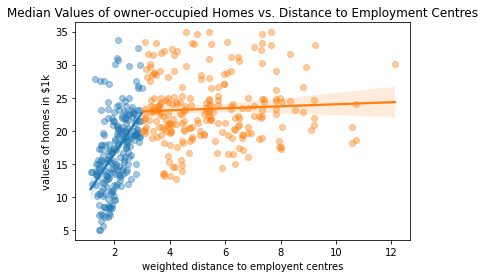

In [57]:
ax = sns.regplot(x=X1, y=y1, scatter_kws={'alpha':.4})
sns.regplot(x=X2, y=y2, scatter_kws={'alpha':.4}, ax=ax)
plt.xlabel("weighted distance to employent centres")
plt.ylabel("values of homes in $1k")
plt.title("Median Values of owner-occupied Homes vs. Distance to Employment Centres")
plt.show()

Next, the first piece of data (blue in the above plot) is fit (distance<=3).

In [60]:
X1 = sm.add_constant(X1) 
model = sm.OLS(y1, X1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     71.07
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           5.00e-15
Time:                        12:11:18   Log-Likelihood:                -655.13
No. Observations:                 217   AIC:                             1314.
Df Residuals:                     215   BIC:                             1321.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0995      1.568      2.614      0.010       1.008       7.191
DIS            6.2289      0.739      8.430      0.000       4.773       7.685
==============================================================================
Omnibus:                       20.846   Durbin-Watson:                   0.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.404
Skew:                           0.721   Prob(JB):                     5.02e-06
Kurtosis:                       3.788   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Finally, fit the second chunk of data (red in the above plot), where the distance is larger than 3.

In [61]:
X2 = sm.add_constant(X2) 
model = sm.OLS(y2, X2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7339
Date:                Wed, 24 Aug 2022   Prob (F-statistic):              0.392
Time:                        12:11:45   Log-Likelihood:                -726.49
No. Observations:                 241   AIC:                             1457.
Df Residuals:                     239   BIC:                             1464.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4838      1.006     22.347      0.000      20.502      24.466
DIS            0.1522      0.178      0.857      0.392      -0.198       0.502
==============================================================================
Omnibus:                        7.615   Durbin-Watson:                   0.801
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.884
Skew:                           0.426   Prob(JB):                       0.0194
Kurtosis:                       2.758   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** If the _weighted distance_ (DIS) is shorter than 3, there is a strong and significant effect of this distance to the median house value (MEDV) in a town. The value rises by \\$6.2k per unit distance (standard error: \\$739, p-value<0.001), but is not significantly different to zero, when the _weighted distance_ is beyond 3 (\\$0.15k, standard error: \\$178, p-value: 0.392).